## Car Price Prediction ##

In [148]:
#Import Library 
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')

In [154]:
df=pd.read_csv("audi.csv")
display(df)

model  year  price transmission  mileage fuelType  tax   mpg  engineSize
0        A1  2017  12500       Manual    15735   Petrol  150  55.4         1.4
1        A6  2016  16500    Automatic    36203   Diesel   20  64.2         2.0
2        A1  2016  11000       Manual    29946   Petrol   30  55.4         1.4
3        A4  2017  16800    Automatic    25952   Diesel  145  67.3         2.0
4        A3  2019  17300       Manual     1998   Petrol  145  49.6         1.0
...     ...   ...    ...          ...      ...      ...  ...   ...         ...
10663    A3  2020  16999       Manual     4018   Petrol  145  49.6         1.0
10664    A3  2020  16999       Manual     1978   Petrol  150  49.6         1.0
10665    A3  2020  17199       Manual      609   Petrol  150  49.6         1.0
10666    Q3  2017  19499    Automatic     8646   Petrol  150  47.9         1.4
10667    Q3  2016  15999       Manual    11855   Petrol  150  47.9         1.4

[10668 rows x 9 columns]

## Automated Exploratory Data Analysis (EDA) ##

In [140]:
#Pandas Profiling Report 
import ydata_profiling as pf
display(pf.ProfileReport(df))

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 9/9 [00:00<00:00, 36.64it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Manual EDA ##

In [50]:
##Number of records
print (len(df))

10668


In [51]:
##Number of records- Shape
display (df.shape)

(10668, 9)

In [52]:
##Checking the data types
display (df.dtypes )

model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax               int64
mpg             float64
engineSize      float64
dtype: object

In [53]:
##Checking null values
display (df.isna().sum() )

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [54]:
##Data set details – Info 
print (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   tax           10668 non-null  int64  
 7   mpg           10668 non-null  float64
 8   engineSize    10668 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 750.2+ KB
None


In [55]:
##Data set details – Describe 
display (df.describe ())

year          price        mileage           tax           mpg  \
count  10668.000000   10668.000000   10668.000000  10668.000000  10668.000000   
mean    2017.100675   22896.685039   24827.244001    126.011436     50.770022   
std        2.167494   11714.841888   23505.257205     67.170294     12.949782   
min     1997.000000    1490.000000       1.000000      0.000000     18.900000   
25%     2016.000000   15130.750000    5968.750000    125.000000     40.900000   
50%     2017.000000   20200.000000   19000.000000    145.000000     49.600000   
75%     2019.000000   27990.000000   36464.500000    145.000000     58.900000   
max     2020.000000  145000.000000  323000.000000    580.000000    188.300000   

         engineSize  
count  10668.000000  
mean       1.930709  
std        0.602957  
min        0.000000  
25%        1.500000  
50%        2.000000  
75%        2.000000  
max        6.300000

In [56]:
##Value Counts for Categorical Variables
for col in ['model', 'transmission', 'fuelType']:
    print(f"\nValue counts for {col}:\n", df[col].value_counts())


Value counts for model:
 model
A3     1929
Q3     1417
A4     1381
A1     1347
A5      882
Q5      877
Q2      822
A6      748
Q7      397
TT      336
A7      122
A8      118
Q8       69
RS6      39
RS3      33
RS4      31
RS5      29
R8       28
S3       18
SQ5      16
S4       12
SQ7       8
S8        4
S5        3
A2        1
RS7       1
Name: count, dtype: int64

Value counts for transmission:
 transmission
Manual       4369
Semi-Auto    3591
Automatic    2708
Name: count, dtype: int64

Value counts for fuelType:
 fuelType
Diesel    5577
Petrol    5063
Hybrid      28
Name: count, dtype: int64


In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

In [58]:
numerical_cols = ['year', 'price', 'mileage', 'tax', 'mpg', 'engineSize']


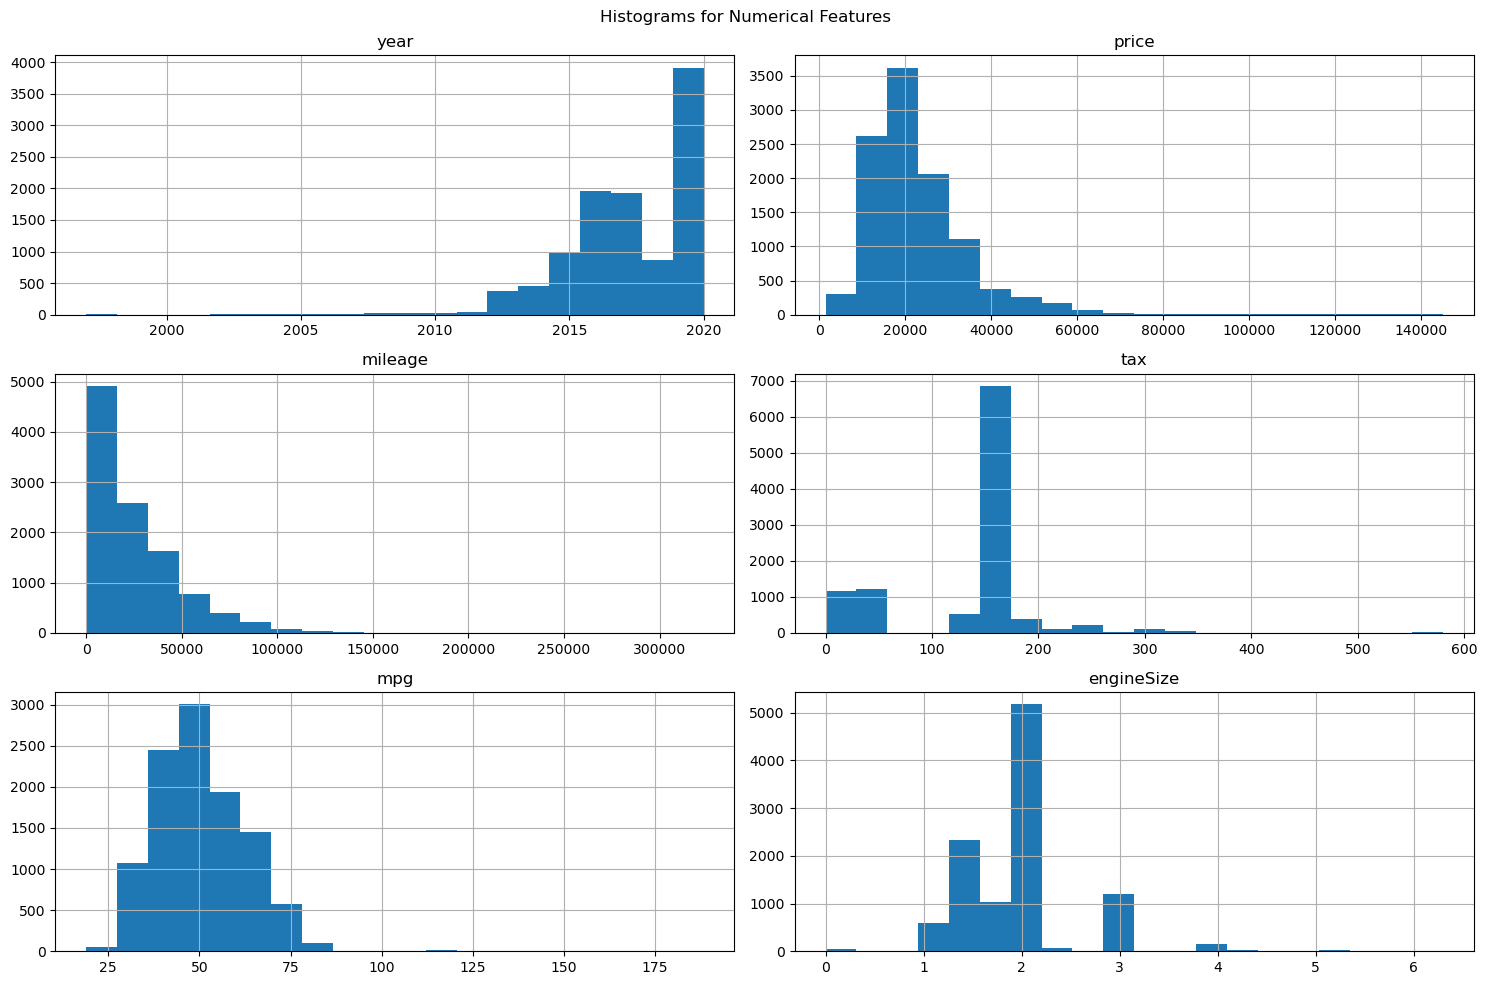

In [59]:
df[numerical_cols].hist(bins=20, figsize=(15,10))
plt.suptitle('Histograms for Numerical Features')
plt.tight_layout()
plt.show()

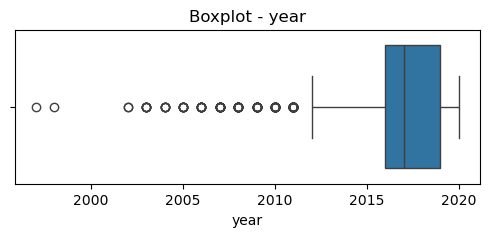

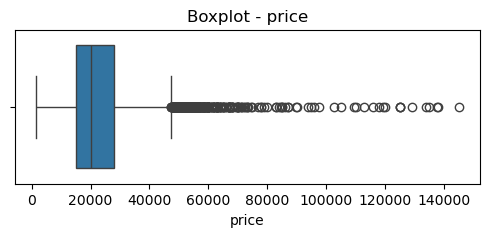

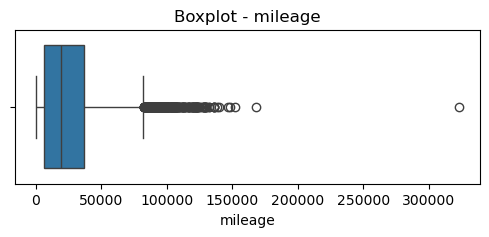

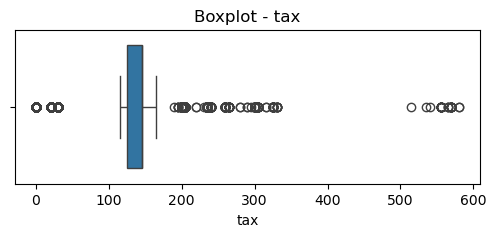

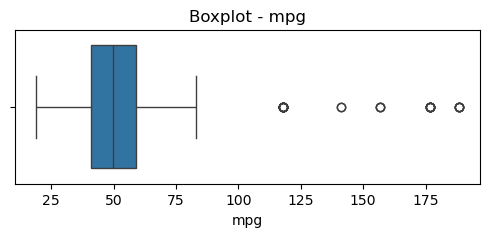

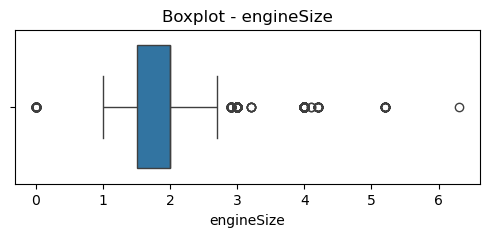

In [61]:
# Boxplots for outliers
for col in numerical_cols:
    plt.figure(figsize=(6, 2))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot - {col}')
    plt.show()

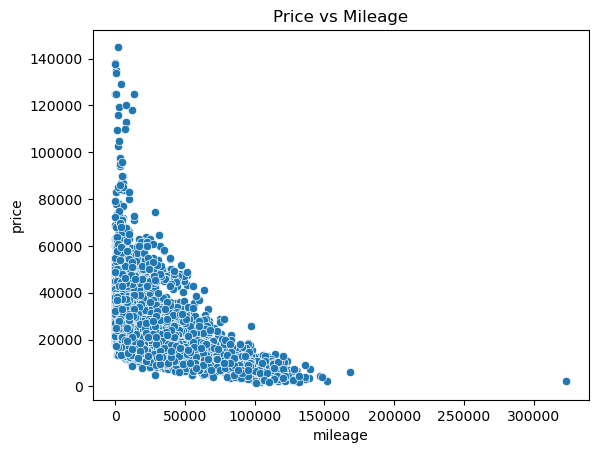

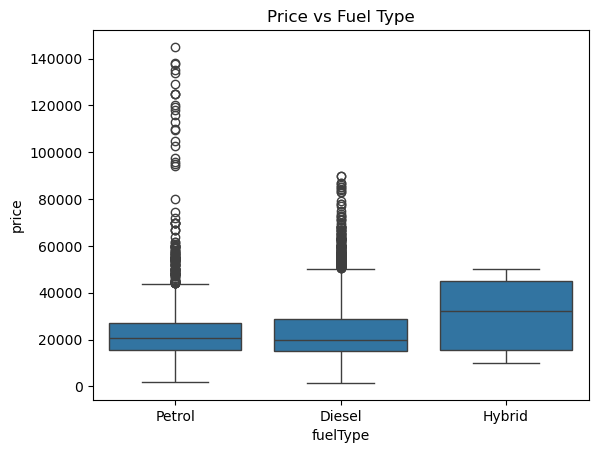

In [60]:
# Price vs mileage
sns.scatterplot(data=df, x='mileage', y='price')
plt.title('Price vs Mileage')
plt.show()

# Boxplot: Price vs Fuel Type
sns.boxplot(data=df, x='fuelType', y='price')
plt.title('Price vs Fuel Type')
plt.show()


In [62]:
# Skewness and Kurtosis
print("Skewness:\n", df[numerical_cols].skew())
print("Kurtosis:\n", df[numerical_cols].kurtosis())

Skewness:
 year         -1.454814
price         2.277323
mileage       1.576429
tax           0.601686
mpg           1.832859
engineSize    1.212639
dtype: float64
Kurtosis:
 year           5.175342
price         11.671632
mileage        4.582588
tax            6.048026
mpg           14.050193
engineSize     3.720700
dtype: float64


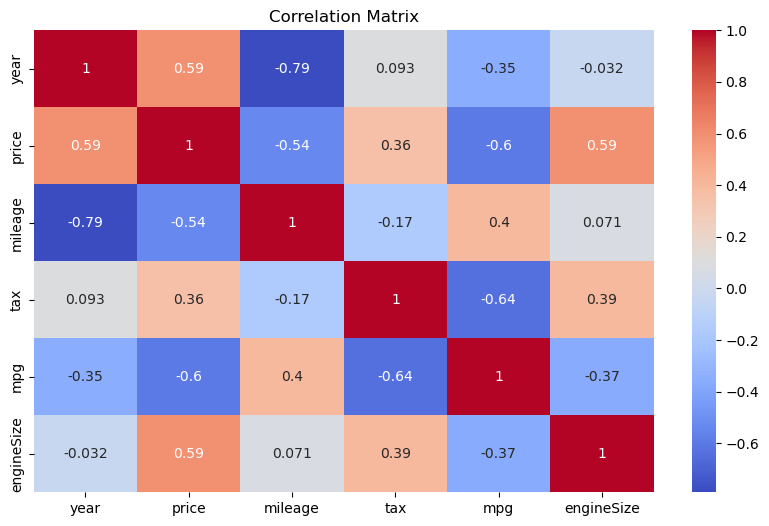

In [64]:
##Corelation Matrix
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [67]:
#Outlier Detection
from scipy.stats import zscore
z_scores = zscore(df[numerical_cols])
outliers = (abs(z_scores) > 3).sum()
print("Outliers per feature (Z-score > 3):\n", dict(zip(numerical_cols, outliers)))

Outliers per feature (Z-score > 3):
 {'year': 123, 'price': 136, 'mileage': 147, 'tax': 46, 'mpg': 33, 'engineSize': 262}


In [68]:
#Create X 
X = df.iloc[:,[0,1,3,4,5,6,7,8]].values
display (X.shape)
display (X)

(10668, 8)

array([[' A1', 2017, 'Manual', ..., 150, 55.4, 1.4],
       [' A6', 2016, 'Automatic', ..., 20, 64.2, 2.0],
       [' A1', 2016, 'Manual', ..., 30, 55.4, 1.4],
       ...,
       [' A3', 2020, 'Manual', ..., 150, 49.6, 1.0],
       [' Q3', 2017, 'Automatic', ..., 150, 47.9, 1.4],
       [' Q3', 2016, 'Manual', ..., 150, 47.9, 1.4]], dtype=object)

In [69]:
#Create Y
Y = df.iloc[:,[2]].values
display (Y.shape)
display (Y)

(10668, 1)

array([[12500],
       [16500],
       [11000],
       ...,
       [17199],
       [19499],
       [15999]], dtype=int64)

In [70]:
#Display Top 5 - X variable 
display(pd.DataFrame(X).head(5))

0     1          2      3       4    5     6    7
0   A1  2017     Manual  15735  Petrol  150  55.4  1.4
1   A6  2016  Automatic  36203  Diesel   20  64.2  2.0
2   A1  2016     Manual  29946  Petrol   30  55.4  1.4
3   A4  2017  Automatic  25952  Diesel  145  67.3  2.0
4   A3  2019     Manual   1998  Petrol  145  49.6  1.0

## Label Encoding ##

In [141]:
#Model and Fuel Type
from sklearn.preprocessing import LabelEncoder
le1 = LabelEncoder()
X[:,0] = le1.fit_transform(X[:,0])
le2 = LabelEncoder()
X[:,-4] = le2.fit_transform(X[:,-4])
display (X)

array([[ 0.        ,  1.2007284 , -0.71233307, ...,  0.35714729,
         0.35755001, -0.88021837],
       [ 1.        , -0.83282781, -0.71233307, ..., -1.57832278,
         1.03713001,  0.11492465],
       [ 0.        ,  1.2007284 , -0.71233307, ..., -1.42944047,
         0.35755001, -0.88021837],
       ...,
       [ 0.        ,  1.2007284 , -0.71233307, ...,  0.35714729,
        -0.09035499, -1.54364705],
       [ 1.        , -0.83282781, -0.71233307, ...,  0.35714729,
        -0.22163749, -0.88021837],
       [ 0.        ,  1.2007284 , -0.71233307, ...,  0.35714729,
        -0.22163749, -0.88021837]])

## One Hot Encoding ##

In [160]:
#One hot Encoding to column – transmission
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer(transformers = [('encoder',OneHotEncoder(),[2])],remainder='passthrough')
X = ct.fit_transform(X)
onehot_features = ct.named_transformers_['encoder'].get_feature_names_out(['transmission'])
other_features = ['model', 'year', 'mileage', 'fuelType', 'tax', 'mpg', 'engineSize']
feature_names = list(onehot_features) + other_features
print(feature_names)
display (X.shape)
display (pd.DataFrame(X))

['transmission_0.0', 'transmission_1.0', 'model', 'year', 'mileage', 'fuelType', 'tax', 'mpg', 'engineSize']


(10668, 12)

0    1    2    3         4         5         6         7    8   \
0      1.0  0.0  1.0  0.0  1.200728 -1.123544 -0.046450 -0.386836  2.0   
1      0.0  1.0  1.0  0.0 -0.832828 -0.160831 -0.507834  0.483989  0.0   
2      1.0  0.0  1.0  0.0  1.200728 -1.123544 -0.507834  0.217781  2.0   
3      0.0  1.0  1.0  0.0 -0.832828 -0.545916 -0.046450  0.047853  0.0   
4      1.0  0.0  1.0  0.0  1.200728 -0.738459  0.876318 -0.971285  2.0   
...    ...  ...  ...  ...       ...       ...       ...       ...  ...   
10663  1.0  0.0  1.0  0.0  1.200728 -0.738459  1.337702 -0.885343  2.0   
10664  1.0  0.0  1.0  0.0  1.200728 -0.738459  1.337702 -0.972136  2.0   
10665  1.0  0.0  1.0  0.0  1.200728 -0.738459  1.337702 -1.030381  2.0   
10666  0.0  1.0  1.0  0.0 -0.832828  0.609339 -0.046450 -0.688442  2.0   
10667  1.0  0.0  1.0  0.0  1.200728  0.609339 -0.507834 -0.551913  2.0   

             9         10        11  
0      0.357147  0.357550 -0.880218  
1     -1.578323  1.037130  0.114925  
2     -1.429440  0.357550 -0.880218  
3      0.282706  1.276528  0.114925  
4      0.282706 -0.090355 -1.543647  
...         ...       ...       ...  
10663  0.282706 -0.090355 -1.543647  
10664  0.357147 -0.090355 -1.543647  
10665  0.357147 -0.090355 -1.543647  
10666  0.357147 -0.221637 -0.880218  
10667  0.357147 -0.221637 -0.880218  

[10668 rows x 12 columns]

## Feature Scaling ##

In [74]:
#Features Scaling – Standardization 

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
display (pd.DataFrame(X))

0         1         2         3         4         5         6  \
0     -0.583268  1.200728 -0.712333 -1.123544 -0.046450 -0.386836  1.050783   
1      1.714479 -0.832828 -0.712333 -0.160831 -0.507834  0.483989 -0.954181   
2     -0.583268  1.200728 -0.712333 -1.123544 -0.507834  0.217781  1.050783   
3      1.714479 -0.832828 -0.712333 -0.545916 -0.046450  0.047853 -0.954181   
4     -0.583268  1.200728 -0.712333 -0.738459  0.876318 -0.971285  1.050783   
...         ...       ...       ...       ...       ...       ...       ...   
10663 -0.583268  1.200728 -0.712333 -0.738459  1.337702 -0.885343  1.050783   
10664 -0.583268  1.200728 -0.712333 -0.738459  1.337702 -0.972136  1.050783   
10665 -0.583268  1.200728 -0.712333 -0.738459  1.337702 -1.030381  1.050783   
10666  1.714479 -0.832828 -0.712333  0.609339 -0.046450 -0.688442  1.050783   
10667 -0.583268  1.200728 -0.712333  0.609339 -0.507834 -0.551913  1.050783   

              7         8         9  
0      0.357147  0.357550 -0.880218  
1     -1.578323  1.037130  0.114925  
2     -1.429440  0.357550 -0.880218  
3      0.282706  1.276528  0.114925  
4      0.282706 -0.090355 -1.543647  
...         ...       ...       ...  
10663  0.282706 -0.090355 -1.543647  
10664  0.357147 -0.090355 -1.543647  
10665  0.357147 -0.090355 -1.543647  
10666  0.357147 -0.221637 -0.880218  
10667  0.357147 -0.221637 -0.880218  

[10668 rows x 10 columns]

In [75]:
#Train Test Split 
from sklearn.model_selection import train_test_split
(X_train,X_test,Y_train,Y_test) = train_test_split(X,Y,test_size=0.2,random_state=0)
print (X.shape, Y.shape)
print (X_train.shape, Y_train.shape)
print (X_test.shape, Y_test.shape)

(10668, 10) (10668, 1)
(8534, 10) (8534, 1)
(2134, 10) (2134, 1)


## Random Forest Regressor ##

In [76]:
from sklearn.ensemble import RandomForestRegressor
regression = RandomForestRegressor(random_state=0)
regression.fit(X_train,Y_train)
display (regression)

RandomForestRegressor(random_state=0)

In [77]:
#Prediction with Test Data 
y_pred = regression.predict(X_test)
display (y_pred)

array([14337.15, 23450.35, 27330.07, ..., 46275.18, 31359.  ,  9929.62])

In [78]:
#Display actual and Predicted Values 
print (pd.concat ([pd.DataFrame(Y_test.reshape(len(Y_test),1),columns =['Car Price']), 
                   pd.DataFrame(y_pred.reshape(len(y_pred),1),columns =['Price Prediction'])],axis =1))

      Car Price  Price Prediction
0         14998          14337.15
1         21950          23450.35
2         28990          27330.07
3         25489          27200.98
4         30950          32250.05
...         ...               ...
2129      23700          39147.77
2130      18000          16679.95
2131      45995          46275.18
2132      30500          31359.00
2133       8400           9929.62

[2134 rows x 2 columns]


In [79]:
#Display – Accuracy and Mean Absolute Error 

from sklearn.metrics import r2_score,mean_absolute_error
print  ('R2 Score ', r2_score(Y_test, y_pred))
print  ('Mean Absolute Error', mean_absolute_error(Y_test,y_pred))

R2 Score  0.9536134841307546
Mean Absolute Error 1538.730980670462


In [80]:
#Prediction with Complete Data 
f_pred = regression.predict(X)
display (f_pred)

array([12864.85, 16457.12, 11755.03, ..., 17642.77, 20217.97, 18360.66])

In [81]:
#Display actual and Predicted Values 
display(pd.concat ([df,pd.DataFrame(f_pred.reshape(len(f_pred),1),columns =['Price Prediction'])],axis =1))

model  year  price transmission  mileage fuelType  tax   mpg  \
0        A1  2017  12500       Manual    15735   Petrol  150  55.4   
1        A6  2016  16500    Automatic    36203   Diesel   20  64.2   
2        A1  2016  11000       Manual    29946   Petrol   30  55.4   
3        A4  2017  16800    Automatic    25952   Diesel  145  67.3   
4        A3  2019  17300       Manual     1998   Petrol  145  49.6   
...     ...   ...    ...          ...      ...      ...  ...   ...   
10663    A3  2020  16999       Manual     4018   Petrol  145  49.6   
10664    A3  2020  16999       Manual     1978   Petrol  150  49.6   
10665    A3  2020  17199       Manual      609   Petrol  150  49.6   
10666    Q3  2017  19499    Automatic     8646   Petrol  150  47.9   
10667    Q3  2016  15999       Manual    11855   Petrol  150  47.9   

       engineSize  Price Prediction  
0             1.4          12864.85  
1             2.0          16457.12  
2             1.4          11755.03  
3             2.0          17664.67  
4             1.0          17191.84  
...           ...               ...  
10663         1.0          17052.35  
10664         1.0          16985.51  
10665         1.0          17642.77  
10666         1.4          20217.97  
10667         1.4          18360.66  

[10668 rows x 10 columns]

In [82]:
#Display – Accuracy and Mean Absolute Error 

from sklearn.metrics import r2_score,mean_absolute_error
print  ('R2 Score ', r2_score(Y, f_pred))
print  ('Mean Absolute Error', mean_absolute_error(Y,f_pred))

R2 Score  0.9854936957854944
Mean Absolute Error 784.8616110361777


## Feature Importance Bar Plot ##

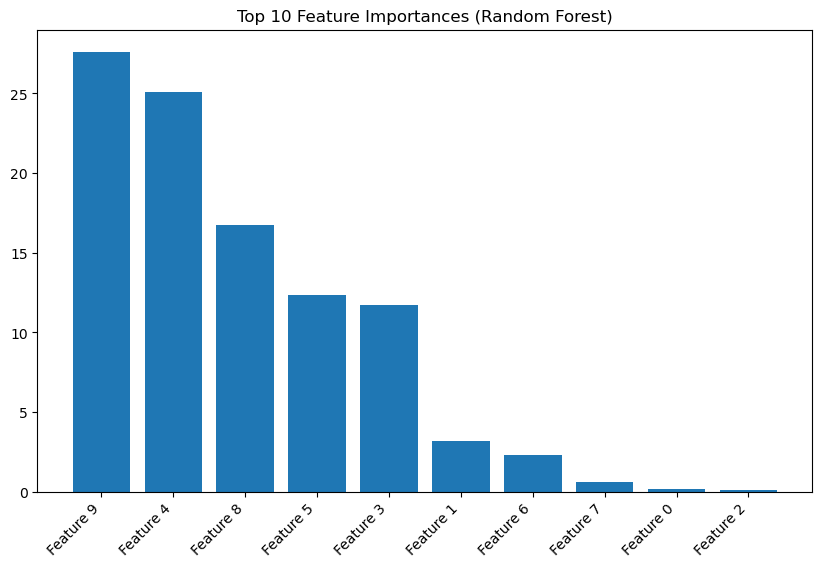

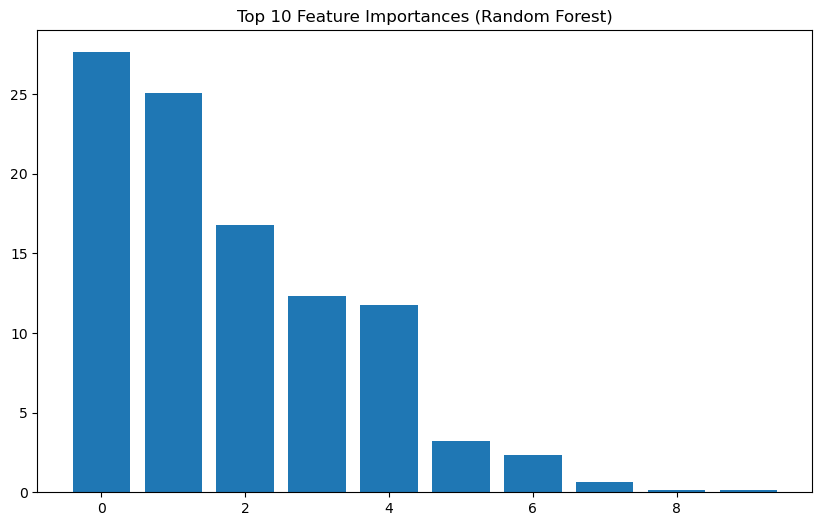

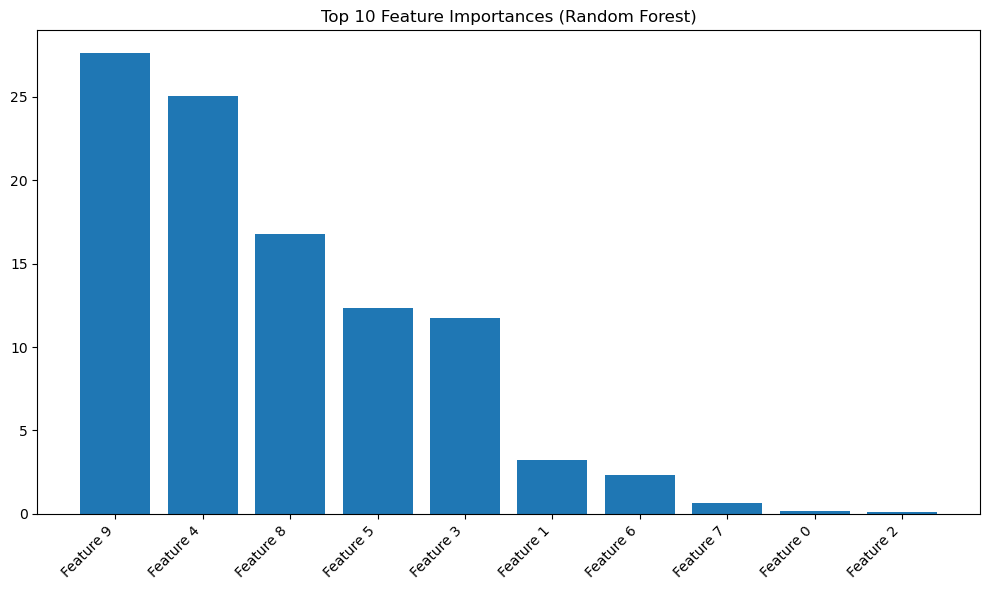

In [129]:
importances = model.feature_importances_
feature_names = [f"Feature {i}" for i in range(X_train.shape[1])]

# Get indices of top 10 features
indices = np.argsort(importances)[::-1][:10]

# Plot
plt.figure(figsize=(10,6))
plt.title("Top 10 Feature Importances (Random Forest)")
plt.bar(range(10), importances[indices], align='center')
plt.xticks(range(10), [feature_names[i] for i in indices], rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Shap Summary Plot ##

In [131]:
!pip install shap

   ---------------------------------------- 0.0/545.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/545.2 kB ? eta -:--:--
   ------------------- -------------------- 262.1/545.2 kB ? eta -:--:--
   ---------------------------------------- 545.2/545.2 kB 1.1 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.1
    Uninstalling joblib-1.1.1:
      Successfully uninstalled joblib-1.1.1


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires joblib~=1.1.0, but you have joblib 1.5.1 which is incompatible.
pandas-profiling 3.2.0 requires visions[type_image_path]==0.7.4, but you have visions 0.8.1 which is incompatible.


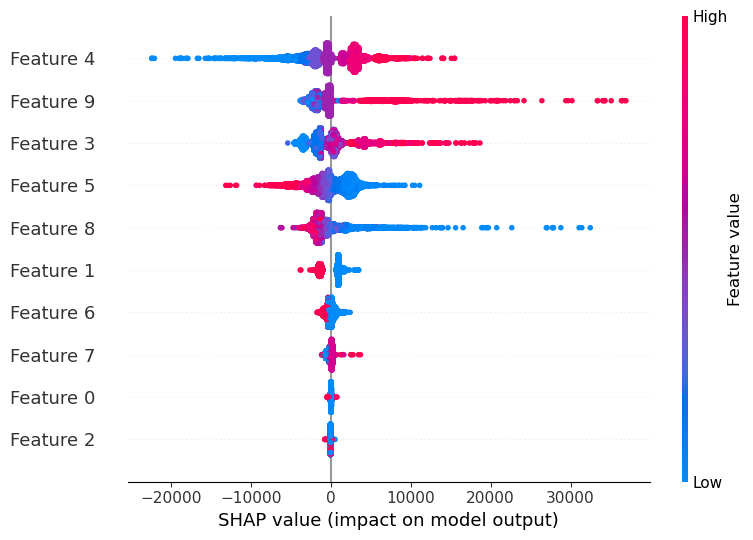

In [142]:
import shap

# Create a SHAP explainer for Random Forest
explainer = shap.TreeExplainer(model)  # Works well with tree-based models like Random Forest or CatBoost
shap_values = explainer.shap_values(X_train)

# Summary plot
shap.summary_plot(shap_values, X_train)

## Linear Regression Model ##

In [143]:
 from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,Y_train)
print(reg)

LinearRegression()


In [84]:
#Prediction with Test Data 
y_pred = reg.predict(X_test)
display (y_pred)

array([[13091.52500293],
       [29387.52500293],
       [31823.52500293],
       ...,
       [42695.52500293],
       [31583.52500293],
       [ 7311.52500293]])

In [85]:
#Display actual and Predicted Values (Test Data) 

print (pd.concat ([pd.DataFrame(Y_test.reshape(len(Y_test),1),columns =['Car Price']), 
                   pd.DataFrame(y_pred.reshape(len(y_pred),1),columns =['Price Prediction'])],axis =1))

      Car Price  Price Prediction
0         14998      13091.525003
1         21950      29387.525003
2         28990      31823.525003
3         25489      26855.525003
4         30950      31503.525003
...         ...               ...
2129      23700      41467.525003
2130      18000      20743.525003
2131      45995      42695.525003
2132      30500      31583.525003
2133       8400       7311.525003

[2134 rows x 2 columns]


In [86]:
#Display – Accuracy and Mean Absolute Error 

from sklearn.metrics import r2_score,mean_absolute_error
print  ('R2 Score ', r2_score(Y_test, y_pred))
print  ('Mean Absolute Error', mean_absolute_error(Y_test,y_pred))

R2 Score  0.7915402594567064
Mean Absolute Error 3379.8051549247084


In [87]:
#Prediction for complete data set 
f_pred = reg.predict(X)
display (f_pred)

array([[14659.52500293],
       [20531.52500293],
       [13835.52500293],
       ...,
       [19443.52500293],
       [20907.52500293],
       [16735.52500293]])

In [88]:
#Display the Actual and predicted data  

result = pd.concat([df,pd.DataFrame(f_pred,columns = ['Price Prediction'])],axis=1)
display( result)

model  year  price transmission  mileage fuelType  tax   mpg  \
0        A1  2017  12500       Manual    15735   Petrol  150  55.4   
1        A6  2016  16500    Automatic    36203   Diesel   20  64.2   
2        A1  2016  11000       Manual    29946   Petrol   30  55.4   
3        A4  2017  16800    Automatic    25952   Diesel  145  67.3   
4        A3  2019  17300       Manual     1998   Petrol  145  49.6   
...     ...   ...    ...          ...      ...      ...  ...   ...   
10663    A3  2020  16999       Manual     4018   Petrol  145  49.6   
10664    A3  2020  16999       Manual     1978   Petrol  150  49.6   
10665    A3  2020  17199       Manual      609   Petrol  150  49.6   
10666    Q3  2017  19499    Automatic     8646   Petrol  150  47.9   
10667    Q3  2016  15999       Manual    11855   Petrol  150  47.9   

       engineSize  Price Prediction  
0             1.4      14659.525003  
1             2.0      20531.525003  
2             1.4      13835.525003  
3             2.0      19807.525003  
4             1.0      17379.525003  
...           ...               ...  
10663         1.0      19219.525003  
10664         1.0      19315.525003  
10665         1.0      19443.525003  
10666         1.4      20907.525003  
10667         1.4      16735.525003  

[10668 rows x 10 columns]

In [89]:
#Display – Accuracy and Mean Absolute Error 

from sklearn.metrics import r2_score,mean_absolute_error
print  ('R2 Score ', r2_score(Y, f_pred))
print  ('Mean Absolute Error', mean_absolute_error(Y,f_pred))

R2 Score  0.7906956411832954
Mean Absolute Error 3341.8759001082944


## Extra Tree Regressor ##

In [144]:
from sklearn.ensemble import  ExtraTreesRegressor
ET_Model=ExtraTreesRegressor(n_estimators = 120)
ET_Model.fit(X_train,Y_train)
y_predict=ET_Model.predict(X_test)
from sklearn.metrics import r2_score,mean_absolute_error
print  ('R2 Score ', r2_score(Y_test, y_predict))
print  ('Mean Absolute Error', mean_absolute_error(Y_test,y_predict))

R2 Score  0.9565324784202625
Mean Absolute Error 1538.6707483338544


In [91]:
#Display the Result Complete Data 
f_pred = ET_Model.predict(X)
display (f_pred)
result = pd.concat([df,pd.DataFrame(f_pred,columns = ['Price Prediction'])],axis=1)
display( result)

array([12500.        , 16500.        , 11000.        , ...,
       17199.        , 19499.        , 17988.38333333])

model  year  price transmission  mileage fuelType  tax   mpg  \
0        A1  2017  12500       Manual    15735   Petrol  150  55.4   
1        A6  2016  16500    Automatic    36203   Diesel   20  64.2   
2        A1  2016  11000       Manual    29946   Petrol   30  55.4   
3        A4  2017  16800    Automatic    25952   Diesel  145  67.3   
4        A3  2019  17300       Manual     1998   Petrol  145  49.6   
...     ...   ...    ...          ...      ...      ...  ...   ...   
10663    A3  2020  16999       Manual     4018   Petrol  145  49.6   
10664    A3  2020  16999       Manual     1978   Petrol  150  49.6   
10665    A3  2020  17199       Manual      609   Petrol  150  49.6   
10666    Q3  2017  19499    Automatic     8646   Petrol  150  47.9   
10667    Q3  2016  15999       Manual    11855   Petrol  150  47.9   

       engineSize  Price Prediction  
0             1.4      12500.000000  
1             2.0      16500.000000  
2             1.4      11000.000000  
3             2.0      16800.000000  
4             1.0      17300.000000  
...           ...               ...  
10663         1.0      16999.000000  
10664         1.0      16999.000000  
10665         1.0      17199.000000  
10666         1.4      19499.000000  
10667         1.4      17988.383333  

[10668 rows x 10 columns]

In [92]:
#Display – Accuracy and Mean Absolute Error 

from sklearn.metrics import r2_score,mean_absolute_error
print  ('R2 Score ', r2_score(Y, f_pred))
print  ('Mean Absolute Error', mean_absolute_error(Y,f_pred))

R2 Score  0.9902726416326096
Mean Absolute Error 351.5340047337833


## CatBoost Regressor ##

In [145]:
from catboost import CatBoostRegressor
cat=CatBoostRegressor()
print (cat.fit(X_train,Y_train))

Learning rate set to 0.057452
0:	learn: 11184.0694779	total: 2.78ms	remaining: 2.77s
1:	learn: 10690.2138498	total: 5.27ms	remaining: 2.63s
2:	learn: 10221.1011877	total: 7.72ms	remaining: 2.56s
3:	learn: 9778.8067263	total: 10.1ms	remaining: 2.52s
4:	learn: 9382.6454054	total: 12.4ms	remaining: 2.47s
5:	learn: 8989.9290587	total: 14.6ms	remaining: 2.42s
6:	learn: 8628.4892653	total: 16.8ms	remaining: 2.38s
7:	learn: 8280.9179062	total: 19ms	remaining: 2.36s
8:	learn: 7950.5476053	total: 21.4ms	remaining: 2.35s
9:	learn: 7636.7735365	total: 23.8ms	remaining: 2.36s
10:	learn: 7349.6084699	total: 26.4ms	remaining: 2.38s
11:	learn: 7084.0457263	total: 29ms	remaining: 2.39s
12:	learn: 6842.7060927	total: 31.7ms	remaining: 2.41s
13:	learn: 6608.0244743	total: 34ms	remaining: 2.39s
14:	learn: 6387.7285726	total: 36.3ms	remaining: 2.38s
15:	learn: 6170.1354894	total: 38.8ms	remaining: 2.38s
16:	learn: 5973.9133066	total: 41.3ms	remaining: 2.39s
17:	learn: 5780.4713044	total: 44.1ms	remaining:

In [94]:
#Cat Boost Prediction test Data 
cat_pred=cat.predict(X_test)
display (cat_pred)

array([13386.63817795, 24056.86842882, 28082.99514751, ...,
       45959.31234642, 31714.44751009,  9481.45994163])

In [95]:
#Cat Boost Accuracy
print  ('Mean Absolute Error', mean_absolute_error(Y_test,cat_pred))
print  ('R2 Score ', r2_score(Y_test,cat_pred))

Mean Absolute Error 1453.5230700749125
R2 Score  0.9641612028134969


In [96]:
#Prediction Complete Data 
catf_pred = cat.predict(X)
display (catf_pred )

array([13989.8267214 , 16578.03846793, 12489.54800057, ...,
       18716.55396652, 20908.57305802, 17896.99245815])

In [97]:
#Display the result
result = pd.concat([df,pd.DataFrame(catf_pred ,columns = ['Price Prediction'])],axis=1)
display( result)

model  year  price transmission  mileage fuelType  tax   mpg  \
0        A1  2017  12500       Manual    15735   Petrol  150  55.4   
1        A6  2016  16500    Automatic    36203   Diesel   20  64.2   
2        A1  2016  11000       Manual    29946   Petrol   30  55.4   
3        A4  2017  16800    Automatic    25952   Diesel  145  67.3   
4        A3  2019  17300       Manual     1998   Petrol  145  49.6   
...     ...   ...    ...          ...      ...      ...  ...   ...   
10663    A3  2020  16999       Manual     4018   Petrol  145  49.6   
10664    A3  2020  16999       Manual     1978   Petrol  150  49.6   
10665    A3  2020  17199       Manual      609   Petrol  150  49.6   
10666    Q3  2017  19499    Automatic     8646   Petrol  150  47.9   
10667    Q3  2016  15999       Manual    11855   Petrol  150  47.9   

       engineSize  Price Prediction  
0             1.4      13989.826721  
1             2.0      16578.038468  
2             1.4      12489.548001  
3             2.0      18793.884463  
4             1.0      18493.205301  
...           ...               ...  
10663         1.0      19428.713314  
10664         1.0      18877.541748  
10665         1.0      18716.553967  
10666         1.4      20908.573058  
10667         1.4      17896.992458  

[10668 rows x 10 columns]

In [98]:
#Display the Accuracy and Error 

from sklearn.metrics import r2_score,mean_absolute_error
print  ('R2 Score ', r2_score(Y, catf_pred))
print  ('Mean Absolute Error', mean_absolute_error(Y,catf_pred))

R2 Score  0.9745608180217411
Mean Absolute Error 1300.981301437808


## RandomizedSearchCV ##

In [99]:
# Hyperparameter Tuning and RandomizedSearchCV - Model used – RandomForestRegressor

from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 80, stop = 1500, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(6, 45, num = 5)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

# create random grid

rand_grid={'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

rf=RandomForestRegressor()

rCV=RandomizedSearchCV(estimator=rf,param_distributions=rand_grid,scoring='neg_mean_squared_error',n_iter=10,cv=5,random_state=42, n_jobs = -1)

In [100]:
#Fit Model

display (rCV.fit(X_train,Y_train))

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [6, 15, 25, 35, 45],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [80, 237, 395, 553, 711,
                                                         868, 1026, 1184, 1342,
                                                         1500]},
                   random_state=42, scoring='neg_mean_squared_error')

In [101]:
#Prediction 
rf_pred=rCV.predict(X_test)
display (rf_pred)

array([14061.79673519, 23781.84509779, 28499.29141314, ...,
       48298.58761297, 31343.02776995, 10041.84850009])

In [102]:
#Mean_absolute_error and mean_squared_error

from sklearn.metrics import mean_absolute_error,mean_squared_error
print('MAE',mean_absolute_error(Y_test,rf_pred))
print('MSE',mean_squared_error(Y_test,rf_pred))

MAE 1503.9896552941282
MSE 5663965.287360494


In [103]:
#Display Accuracy
display (r2_score(Y_test,rf_pred))

0.9587823486057876

In [104]:
#Display the Result Complete the Data 
full_rf_pred=rCV.predict(X)
display (full_rf_pred)

array([13294.28269701, 16498.15424214, 11974.34588829, ...,
       18039.62556021, 20497.71280648, 18527.83917508])

In [105]:
#Display Error and accuracy 

from sklearn.metrics import mean_absolute_error,mean_squared_error
print('MAE',mean_absolute_error(Y,full_rf_pred))
print('MSE',mean_squared_error(Y,full_rf_pred))
display (r2_score(Y,full_rf_pred))

MAE 1136.7250415538692
MSE 3158988.077576448


0.9769794425561436

## Cross Validation Metric Visualization ##

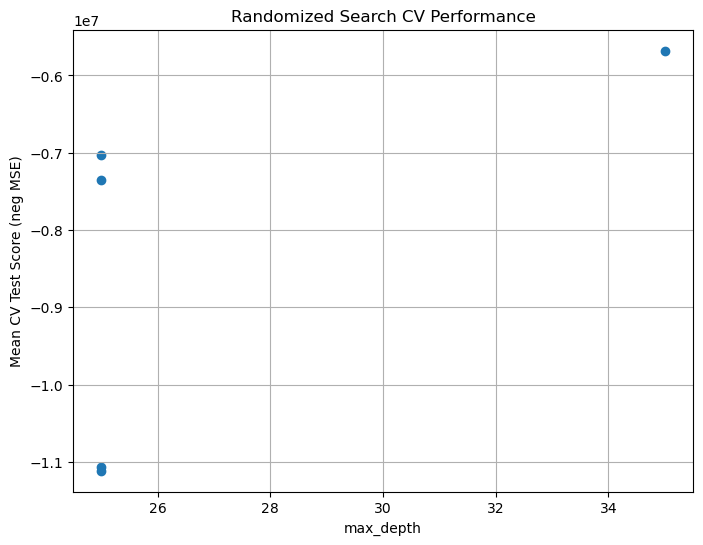

In [134]:
results = rCV.cv_results_
mean_test_scores = results['mean_test_score']  # This will be negative MSE
params = results['params']

# Example: Plotting 'max_depth' vs mean test score
param_name = 'max_depth'
param_values = [param[param_name] for param in params]

plt.figure(figsize=(8,6))
plt.scatter(param_values, mean_test_scores)
plt.xlabel(param_name)
plt.ylabel('Mean CV Test Score (neg MSE)')
plt.title('Randomized Search CV Performance')
plt.grid(True)
plt.show()

## Creating a Pickle File ##

In [146]:
 import pickle 
# Saving model to disk
pickle.dump(cat, open('model.pkl','wb'))

In [107]:
#Load Pickle File and  do Prediction  
model=pickle.load(open('model.pkl','rb'))
p_pred = model.predict (X)
print (p_pred)

[13989.8267214  16578.03846793 12489.54800057 ... 18716.55396652
 20908.57305802 17896.99245815]


In [108]:
#Display the result   

result = pd.concat([df,pd.DataFrame(p_pred ,columns = ['Price Prediction'])],axis=1)
display( result)

model  year  price transmission  mileage fuelType  tax   mpg  \
0        A1  2017  12500       Manual    15735   Petrol  150  55.4   
1        A6  2016  16500    Automatic    36203   Diesel   20  64.2   
2        A1  2016  11000       Manual    29946   Petrol   30  55.4   
3        A4  2017  16800    Automatic    25952   Diesel  145  67.3   
4        A3  2019  17300       Manual     1998   Petrol  145  49.6   
...     ...   ...    ...          ...      ...      ...  ...   ...   
10663    A3  2020  16999       Manual     4018   Petrol  145  49.6   
10664    A3  2020  16999       Manual     1978   Petrol  150  49.6   
10665    A3  2020  17199       Manual      609   Petrol  150  49.6   
10666    Q3  2017  19499    Automatic     8646   Petrol  150  47.9   
10667    Q3  2016  15999       Manual    11855   Petrol  150  47.9   

       engineSize  Price Prediction  
0             1.4      13989.826721  
1             2.0      16578.038468  
2             1.4      12489.548001  
3             2.0      18793.884463  
4             1.0      18493.205301  
...           ...               ...  
10663         1.0      19428.713314  
10664         1.0      18877.541748  
10665         1.0      18716.553967  
10666         1.4      20908.573058  
10667         1.4      17896.992458  

[10668 rows x 10 columns]

In [109]:
#Display the Accuracy and Error   

from sklearn.metrics import r2_score,mean_absolute_error
print  ('R2 Score ', r2_score(Y, p_pred))
print  ('Mean Absolute Error', mean_absolute_error(Y,p_pred))

R2 Score  0.9745608180217411
Mean Absolute Error 1300.981301437808


## XGBoost ##

In [119]:
!pip install xgboost

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/150.0 MB 1.4 MB/s eta 0:01:47
   ---------------------------------------- 0.8/150.0 MB 1.5 MB/s eta 0:01:43
   ---------------------------------------- 1.3/150.0 MB 1.8 MB/s eta 0:01:25
   ---------------------------------------- 1.8/150.0 MB 1.9 MB/s eta 0:01:20
    --------------------------------------- 2.1/150.0 MB 1.8 MB/s eta 0:01:21
    --------------------------------------- 2.4/150.0 MB 1.9 MB/s eta 0:01:20
    --------------------------------------- 2.6/150.0 MB 1.6 MB/s eta 0:01:30
    --------------------------------------- 2.6/150.0 MB 1.6 MB/s eta 0:01:30
    --------------------------------------- 2.6/150.0 MB 1.6 MB/s eta 0:01:30
    --------------------------------------- 3.1/150.0 MB 1.4 MB/s eta 0:01:42
    --------------------------------------- 3.4/150.0 MB 1.4 MB/s eta 0:01:47


In [120]:
import xgboost as xgb
from xgboost import XGBRegressor

# Create model instance
xgb_model = XGBRegressor(random_state=42)

# Fit model
xgb_model.fit(X_train, Y_train)

# Predict on test set
xgb_preds = xgb_model.predict(X_test)

In [122]:
# Evaluate XGBoost Model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("XGBoost MAE:", mean_absolute_error(Y_test, xgb_preds))
print("XGBoost MSE:", mean_squared_error(Y_test, xgb_preds))
print("XGBoost R² Score:", r2_score(Y_test, xgb_preds))

XGBoost MAE: 1454.6591928440942
XGBoost MSE: 4909760.96689972
XGBoost R² Score: 0.964270830154419


## Feature Importance ##

<Figure size 1000x600 with 0 Axes>

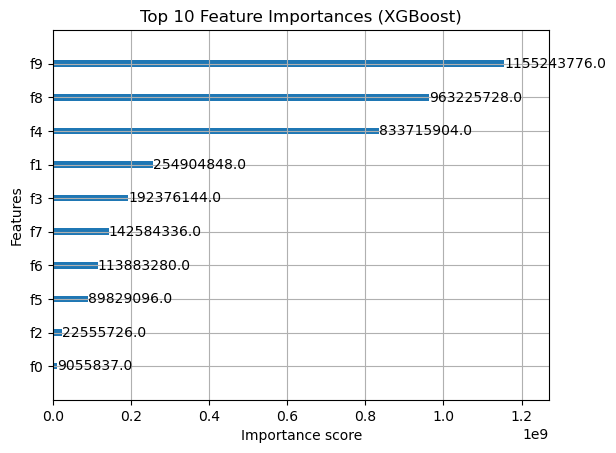

In [147]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot feature importance
plt.figure(figsize=(10,6))
xgb.plot_importance(xgb_model, importance_type="gain", max_num_features=10)
plt.title("Top 10 Feature Importances (XGBoost)")
plt.show()

In [125]:
# comparing with Random Forest
print("Random Forest R²:", r2_score(Y_test, rf_pred))
print("XGBoost R²:", r2_score(Y_test, xgb_preds))

Random Forest R²: 0.9587823486057876
XGBoost R²: 0.964270830154419
